# Notebook 3 — Entrenamiento y Evaluación de Modelos

Incluye: Imports, Carga del dataset procesado, Entrenamiento/Evaluación y Análisis/Guardado.

## Celda de Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# === Celda de Imports ===
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

import joblib


## Celda de Carga del Dataset Procesado (Ajusta rutas)

In [6]:
# === Celda de Carga del Dataset Procesado (Ajusta rutas) ===
# Ajusta esta ruta si guardaste con otro nombre en el Notebook 2
DATA_PROCESSED = "/content/drive/MyDrive/Colab Notebooks/SEXTO TRIMESTRE/cleaned_enriched_lags.csv"

df = pd.read_csv(DATA_PROCESSED)
print("Loaded processed shape:", df.shape)
df.head()


Loaded processed shape: (8750, 27)


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,...,Rented Bike Count_lag24,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Rented Bike Count
0,-0.217875,-1.383953,-1.694609,-0.512034,0.921124,-1.949917,0.094042,-0.189832,-0.191949,-3.304691,...,-0.311159,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,339.0
1,-0.073395,-1.130986,-1.842855,-0.413848,0.822303,-1.872895,0.429108,-0.189832,-0.191949,-3.304691,...,-0.311159,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,360.0
2,0.071084,-0.945477,-1.744024,-0.315663,0.927712,-1.641830,0.625527,-0.189832,-0.191949,-3.304691,...,-0.311159,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,449.0
3,0.215563,-0.886451,-1.645193,-0.119292,0.927712,-1.518595,0.683297,-0.189832,-0.191949,-3.304691,...,-0.311159,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,451.0
4,0.360042,-0.835858,-1.595778,0.273449,0.927712,-1.441573,0.509987,-0.189832,-0.191949,-3.304691,...,-0.311159,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,447.0


## Celda de Entrenamiento y Evaluación

## Celda de Análisis y Guardado (Ajusta rutas)

In [8]:
# === Celda de Entrenamiento y Evaluación (compat corregida) ===
# Definir columna objetivo
TARGET = "Rented Bike Count"
if TARGET not in df.columns:
    raise ValueError(f"No se encontró la columna objetivo '{TARGET}' en el dataset procesado.")

# Separar X, y
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

# Partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Baseline
from sklearn.dummy import DummyRegressor
baseline = DummyRegressor(strategy="median")
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

# Modelo principal
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas (compatibilidad con versiones antiguas de sklearn)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def metrics(y_true, y_hat):
    mae = mean_absolute_error(y_true, y_hat)
    # intentar RMSE con squared=False y si falla usar sqrt(MSE)
    try:
        rmse = mean_squared_error(y_true, y_hat, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_hat))
    r2 = r2_score(y_true, y_hat)
    return {"MAE": float(mae), "RMSE": float(rmse), "R2": float(r2)}

m_base = metrics(y_test, y_pred_base)
m_model = metrics(y_test, y_pred)

print("Baseline:", m_base)
print("Model   :", m_model)

# Residuales para análisis
residuals = y_test - y_pred
preds_df = pd.DataFrame({
    "y_real": y_test.values,
    "y_pred": y_pred,
    "residual": residuals
}, index=y_test.index)

preds_df.head()

Baseline: {'MAE': 509.3470685714285, 'RMSE': 673.200233696632, 'R2': -0.08585308585960671}
Model   : {'MAE': 55.53813809318712, 'RMSE': 92.98472686892981, 'R2': 0.9792840052057697}


,y_real,y_pred,residual
2333,555.0,540.469209,14.530791
2778,95.0,97.507980,-2.507980
5035,133.0,117.095588,15.904412
6857,304.0,273.779042,30.220958
6429,381.0,382.842283,-1.842283


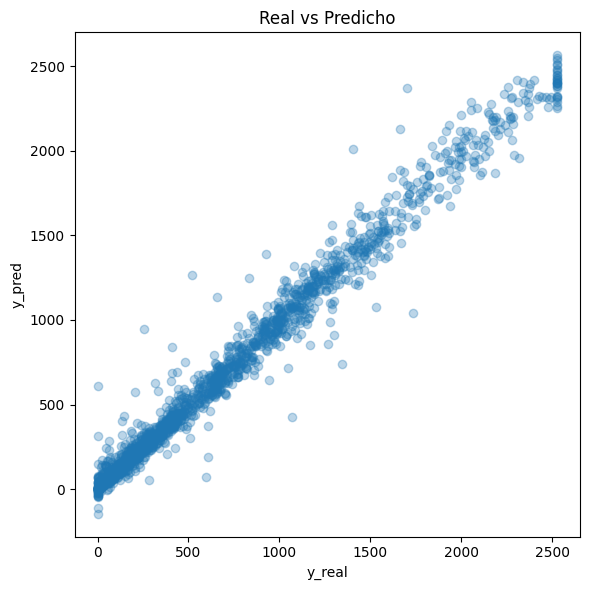

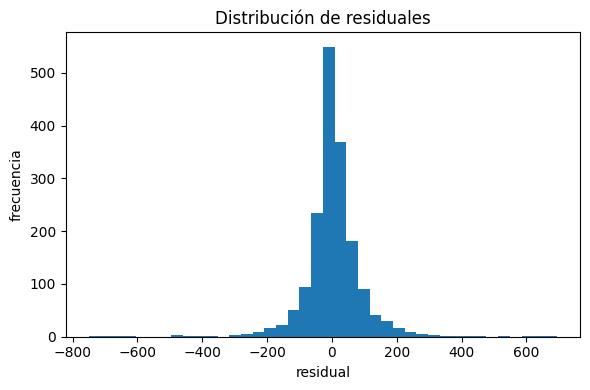

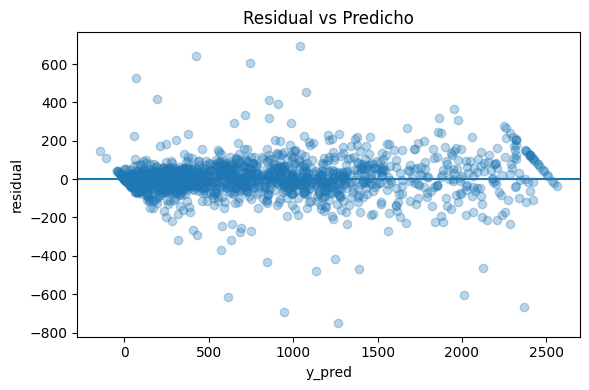

Modelo guardado en: models/hgb_model.joblib
Métricas guardadas en: metrics/metrics.json
Predicciones de test guardadas en: outputs/test_predictions.csv


In [9]:
# === Celda de Análisis y Guardado (Ajusta rutas) ===
# Carpeta de salida
os.makedirs("models", exist_ok=True)
os.makedirs("metrics", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# 1) Gráficos simples
#   - Dispersión y_real vs y_pred
plt.figure(figsize=(6, 6))
plt.scatter(preds_df["y_real"], preds_df["y_pred"], alpha=0.3)
plt.xlabel("y_real"); plt.ylabel("y_pred"); plt.title("Real vs Predicho")
plt.tight_layout(); plt.show()

#   - Histograma de residuales
plt.figure(figsize=(6, 4))
plt.hist(preds_df["residual"], bins=40)
plt.title("Distribución de residuales"); plt.xlabel("residual"); plt.ylabel("frecuencia")
plt.tight_layout(); plt.show()

#   - Residual vs y_pred
plt.figure(figsize=(6, 4))
plt.scatter(preds_df["y_pred"], preds_df["residual"], alpha=0.3)
plt.axhline(0.0)
plt.xlabel("y_pred"); plt.ylabel("residual"); plt.title("Residual vs Predicho")
plt.tight_layout(); plt.show()

# 2) Guardados (ajusta rutas si deseas)
MODEL_PATH = "models/hgb_model.joblib"                 # <-- AJUSTAR
METRICS_PATH = "metrics/metrics.json"                  # <-- AJUSTAR
PREDICTIONS_PATH = "outputs/test_predictions.csv"      # <-- AJUSTAR

joblib.dump(model, MODEL_PATH)

all_metrics = {
    "baseline": m_base,
    "model": m_model,
    "n_train": int(len(X_train)),
    "n_test": int(len(X_test))
}
with open(METRICS_PATH, "w") as f:
    json.dump(all_metrics, f, indent=2)

preds_df.to_csv(PREDICTIONS_PATH, index=False)

print(f"Modelo guardado en: {MODEL_PATH}")
print(f"Métricas guardadas en: {METRICS_PATH}")
print(f"Predicciones de test guardadas en: {PREDICTIONS_PATH}")
